In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
healthdata = pd.read_csv('Health.csv')

In [3]:
healthdata

,Ethnicity,Height (CM),Weight (Kg),Will survive till 70
0,White,186.0,90.0,Yes
1,African,185.0,98.0,No
2,Asian,175.0,80.0,No
3,White,180.0,88.0,Yes
4,Asian,178.0,NaN,No
5,Asian,172.0,72.0,Yes
6,African,178.0,75.0,No
7,White,NaN,89.0,Yes
8,African,186.0,90.0,Yes


In [8]:
#split the data
X = healthdata.iloc[:,0:3].values
y = healthdata.iloc[:,3].values
print(X)
print(y)

[['White' 186.0 90.0]
 ['African' 185.0 98.0]
 ['Asian' 175.0 80.0]
 ['White' 180.0 88.0]
 ['Asian' 178.0 nan]
 ['Asian' 172.0 72.0]
 ['African' 178.0 75.0]
 ['White' nan 89.0]
 ['African' 186.0 90.0]]
['Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes']


In [11]:
from sklearn.preprocessing import Imputer
missingdataimputer = Imputer(missing_values = 'NaN', strategy= 'mean',
                            axis = 0)
missingdataimputer  = missingdataimputer.fit(X[:,1:3])
X[:,1:3] = missingdataimputer.transform(X[:,1:3])

In [12]:
print(X)

[['White' 186.0 90.0]
 ['African' 185.0 98.0]
 ['Asian' 175.0 80.0]
 ['White' 180.0 88.0]
 ['Asian' 178.0 85.25]
 ['Asian' 172.0 72.0]
 ['African' 178.0 75.0]
 ['White' 180.0 89.0]
 ['African' 186.0 90.0]]


In [13]:
from sklearn.preprocessing import LabelEncoder
xlabelencoder = LabelEncoder()
X[:,0] = xlabelencoder.fit_transform(X[:,0])
print(X)
ylabelecoder = LabelEncoder()
y = ylabelecoder.fit_transform(y)
print(y)

[[2 186.0 90.0]
 [0 185.0 98.0]
 [1 175.0 80.0]
 [2 180.0 88.0]
 [1 178.0 85.25]
 [1 172.0 72.0]
 [0 178.0 75.0]
 [2 180.0 89.0]
 [0 186.0 90.0]]
[1 0 0 1 0 1 0 1 1]


In [15]:
from sklearn.preprocessing import OneHotEncoder
xonehotencoder = OneHotEncoder(categorical_features = [0])
X = xonehotencoder.fit_transform(X).toarray()
print(X)

[[   0.      0.      1.    186.     90.  ]
 [   1.      0.      0.    185.     98.  ]
 [   0.      1.      0.    175.     80.  ]
 [   0.      0.      1.    180.     88.  ]
 [   0.      1.      0.    178.     85.25]
 [   0.      1.      0.    172.     72.  ]
 [   1.      0.      0.    178.     75.  ]
 [   0.      0.      1.    180.     89.  ]
 [   1.      0.      0.    186.     90.  ]]


In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.preprocessing import StandardScaler
independentScaler = StandardScaler()
X_train = independentScaler.fit_transform(X_train)
X_test = independentScaler.transform(X_test)
print(X_test, X_train)

[[-0.8660254  -0.63245553  1.58113883 -0.14693177  0.42022402]
 [-0.8660254   1.58113883 -0.63245553 -1.1754542  -0.64943713]] [[ 1.15470054 -0.63245553 -0.63245553  0.88159065  1.48988518]
 [-0.8660254   1.58113883 -0.63245553 -0.55834074 -0.02546812]
 [ 1.15470054 -0.63245553 -0.63245553  1.08729513  0.53907526]
 [ 1.15470054 -0.63245553 -0.63245553 -0.55834074 -1.24369333]
 [-0.8660254  -0.63245553  1.58113883 -0.14693177  0.30137279]
 [-0.8660254  -0.63245553  1.58113883  1.08729513  0.53907526]
 [-0.8660254   1.58113883 -0.63245553 -1.79256765 -1.60024704]]


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
print(X)

[[   0.      0.      1.    186.     90.  ]
 [   1.      0.      0.    185.     98.  ]
 [   0.      1.      0.    175.     80.  ]
 [   0.      0.      1.    180.     88.  ]
 [   0.      1.      0.    178.     85.25]
 [   0.      1.      0.    172.     72.  ]
 [   1.      0.      0.    178.     75.  ]
 [   0.      0.      1.    180.     89.  ]
 [   1.      0.      0.    186.     90.  ]]


In [26]:
print(principalComponents)

[[ -7.07332569   2.87885319   0.85435785]
 [-13.58056383  -1.74005291  -0.84595794]
 [  7.0423179   -1.87860658  -0.18956012]
 [ -2.42269889  -1.33545938   0.6795378 ]
 [  1.00149079  -1.82559714  -0.24975166]
 [ 15.48730093  -0.60246218  -0.03386167]
 [  9.9127635    3.3320416   -0.33216585]
 [ -3.29693741  -1.81878805   0.64480802]
 [ -7.0703473    2.99007143  -0.52740642]]


In [27]:
print("Sum of variance : ", pca.explained_variance_ratio_)

Sum of variance :  [ 0.93547027  0.05922031  0.00381162]


In [29]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                     'principal component 2',
                                     'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-7.073326,2.878853,0.854358
1,-13.580564,-1.740053,-0.845958
2,7.042318,-1.878607,-0.189560
3,-2.422699,-1.335459,0.679538
4,1.001491,-1.825597,-0.249752
5,15.487301,-0.602462,-0.033862
6,9.912763,3.332042,-0.332166
7,-3.296937,-1.818788,0.644808
8,-7.070347,2.990071,-0.527406


In [30]:
print(pca.explained_variance_ratio_)

[ 0.93547027  0.05922031  0.00381162]


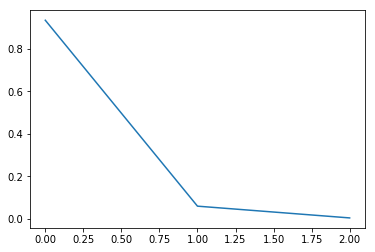

In [32]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
independentScaler1 = StandardScaler()
X1 = independentScaler1.fit_transform(X)
print(X1)

[[-0.70710678 -0.70710678  1.41421356  1.29232469  0.61464681]
 [ 1.41421356 -0.70710678 -0.70710678  1.07693724  1.64984143]
 [-0.70710678  1.41421356 -0.70710678 -1.07693724 -0.67934647]
 [-0.70710678 -0.70710678  1.41421356  0.          0.35584815]
 [-0.70710678  1.41421356 -0.70710678 -0.4307749   0.        ]
 [-0.70710678  1.41421356 -0.70710678 -1.72309958 -1.71454109]
 [ 1.41421356 -0.70710678 -0.70710678 -0.4307749  -1.32634311]
 [-0.70710678 -0.70710678  1.41421356  0.          0.48524748]
 [ 1.41421356 -0.70710678 -0.70710678  1.29232469  0.61464681]]


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X1)
print(X1)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                     'principal component 2',
                                     'principal component 3'])
principalDf

[[-0.70710678 -0.70710678  1.41421356  1.29232469  0.61464681]
 [ 1.41421356 -0.70710678 -0.70710678  1.07693724  1.64984143]
 [-0.70710678  1.41421356 -0.70710678 -1.07693724 -0.67934647]
 [-0.70710678 -0.70710678  1.41421356  0.          0.35584815]
 [-0.70710678  1.41421356 -0.70710678 -0.4307749   0.        ]
 [-0.70710678  1.41421356 -0.70710678 -1.72309958 -1.71454109]
 [ 1.41421356 -0.70710678 -0.70710678 -0.4307749  -1.32634311]
 [-0.70710678 -0.70710678  1.41421356  0.          0.48524748]
 [ 1.41421356 -0.70710678 -0.70710678  1.29232469  0.61464681]]
[ 0.56790157  0.30268959  0.110516  ]


,principal component 1,principal component 2,principal component 3
0,-1.585867,-1.472516,-0.045549
1,-2.025325,1.415903,-0.770678
2,2.082009,0.005833,-0.533873
3,-0.725999,-1.528708,0.434189
4,1.374553,-0.010425,-1.134624
5,2.969036,0.050791,0.300389
6,0.327368,1.566029,1.543893
7,-0.791298,-1.539144,0.349276
8,-1.624478,1.512237,-0.143023


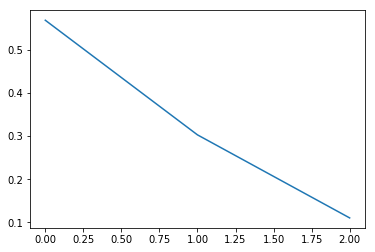

In [35]:
plt.plot(pca.explained_variance_ratio_)
plt.show()